In [1]:
import pandas as pd 

In [2]:
file = r'AllCountries.csv'
df = pd.read_csv(file,sep=';')
df

,country,gender,age
0,China,male,66
1,China,female,56
2,China,male,46
3,China,female,60
4,China,male,58
...,...,...,...
3392,Switzerland,male,26
3393,Switzerland,female,30
3394,Switzerland,male,49
3395,Switzerland,female,NaN


# The distribution of covid-19 by country

In [3]:
df.groupby(['country'])['country'].count()

country
Afghanistan       1
Algeria           1
Australia        15
Austria           2
Bahrain          17
Belgium           1
Cambodia          1
Canada           12
China           197
Croatia           1
Egypt             1
Finland           1
France           56
Germany         168
Hong Kong       102
India             3
Iran             18
Israel            1
Italy            86
Japan           257
Kuwait            9
Lebanon           1
Malaysia         23
Nepal             1
Phillipines       3
Russia            2
Singapore       112
South Korea     114
Spain           116
Sri Lanka         1
Sweden            1
Switzerland      10
Taiwan           34
Thailand         41
UAE              21
UK               20
USA            1768
Vietnam          16
Name: country, dtype: int64

In [4]:
import matplotlib.pyplot as plt

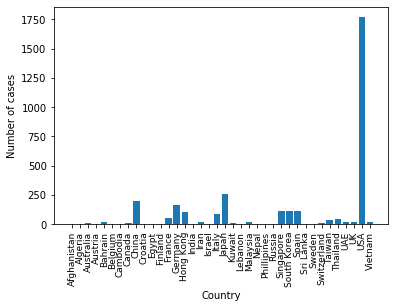

In [5]:
keys = [Country for Country, data in df.groupby(['country'])]

plt.bar(keys,df.groupby(['country'])['country'].count())
plt.ylabel('Number of cases')
plt.xlabel('Country')
plt.xticks(keys, rotation='vertical', size=9)
plt.show()

# The distribution of covid-19 by gender

In [6]:
# Dropping rows containing NA in gender column
df_gender = df.dropna(subset=['country', 'gender'])
df_gender

,country,gender,age
0,China,male,66
1,China,female,56
2,China,male,46
3,China,female,60
4,China,male,58
...,...,...,...
3392,Switzerland,male,26
3393,Switzerland,female,30
3394,Switzerland,male,49
3395,Switzerland,female,NaN


In [7]:
df_gender.groupby(['gender'])['country'].describe()

,count,unique,top,freq
gender,,,,
20,1,1,USA,1
female,723,29,USA,216
male,961,26,USA,283


In [8]:
# Finding row for which column "gender" has value 20
twenty = df_gender['gender'] == "20"
df_gender[twenty]

,country,gender,age
2565,USA,20,NaN


In [9]:
# Deleting row for which column "gender" has value 20
df_gender = df_gender.drop(df.index[2565])

In [10]:
df_gender.groupby(['gender'])['country'].count()

gender
female    723
male      961
Name: country, dtype: int64

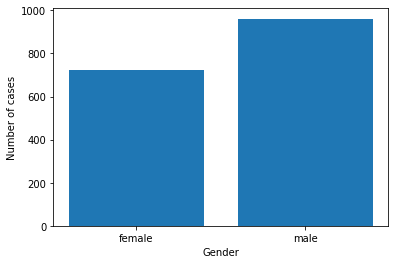

In [11]:
keys = [Gender for Gender, data in df_gender.groupby(['gender'])]

plt.bar(keys,df_gender.groupby(['gender'])['country'].count())
plt.ylabel('Number of cases')
plt.xlabel('Gender')
plt.xticks(keys, rotation='horizontal', size=10)
plt.show()

# The distribution of covid-19 by age group

In [12]:
# Dropping rows containing NA in age column
df_age = df.dropna(subset=['country', 'age'])
df_age

,country,gender,age
0,China,male,66
1,China,female,56
2,China,male,46
3,China,female,60
4,China,male,58
...,...,...,...
3389,Switzerland,NaN,55
3392,Switzerland,male,26
3393,Switzerland,female,30
3394,Switzerland,male,49


In [13]:
df_age.loc[:,('age')] = df_age.loc[:,('age')].replace(['0,5'], '0.5')
df_age.loc[:,('age')] = df_age.loc[:,('age')].replace(['0,25'], '0.25')

C:\Users\JoJo\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [14]:
# Converting the age column entries from str to float
df_age.loc[:,('age')]= pd.to_numeric(df_age.loc[:,('age')])

In [15]:
import numpy as np

In [16]:
#Defining 3 age groups
#dfmi.loc[:, ('one', 'second')]
df_age.loc[:,('Range')] = np.where(df_age.loc[:,('age')] >=30, 'Adult','Young')
df_age.loc[:,('Range')] = np.where(df_age.loc[:,('age')] >=60, 'Old', df_age.loc[:,('Range')])
df_age

C:\Users\JoJo\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\JoJo\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,country,gender,age,Range
0,China,male,66.0,Old
1,China,female,56.0,Adult
2,China,male,46.0,Adult
3,China,female,60.0,Old
4,China,male,58.0,Adult
...,...,...,...,...
3389,Switzerland,NaN,55.0,Adult
3392,Switzerland,male,26.0,Young
3393,Switzerland,female,30.0,Adult
3394,Switzerland,male,49.0,Adult


In [17]:
df_age.groupby(['Range'])['country'].describe()

,count,unique,top,freq
Range,,,,
Adult,757,25,USA,174
Old,519,20,USA,174
Young,231,20,USA,49


In [18]:
df_age.groupby(['Range'])['country'].describe()

,count,unique,top,freq
Range,,,,
Adult,757,25,USA,174
Old,519,20,USA,174
Young,231,20,USA,49


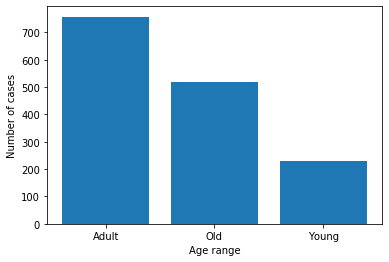

In [19]:
keys = [ranges for ranges, data in df_age.groupby(['Range'])]

plt.bar(keys,df_age.groupby(['Range'])['country'].count())
plt.ylabel('Number of cases')
plt.xlabel('Age range')
plt.xticks(keys, rotation='horizontal', size=10)
plt.show()

# Average age of positive cases, maximum & minimum age, standard deviation by gender (Represented by boxplots) 

Average age of positive cases

In [20]:
df_age['age'].mean()

51.04031187790312

Maximum age

In [21]:
df_age['age'].max()

96.0

Minimum age

In [22]:
df_age['age'].min()

0.25

Standard deviation by gender

In [23]:
df_female = df_age.loc[(df_age.gender == "female") , ['gender', 'age']]
f = df_female.std()
df_male = df_age.loc[(df_age.gender == "male") , ['gender', 'age']]
m = df_male.std()
print("male standev = ", m)
print("female standev = ",f)

male standev =  age    18.064222
dtype: float64
female standev =  age    19.39167
dtype: float64


Boxplots

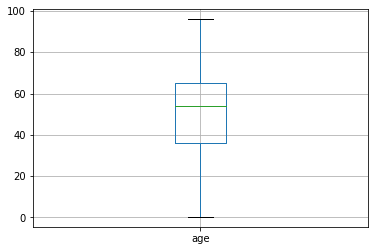

In [24]:
df_age.boxplot();

In [25]:
import seaborn as sns

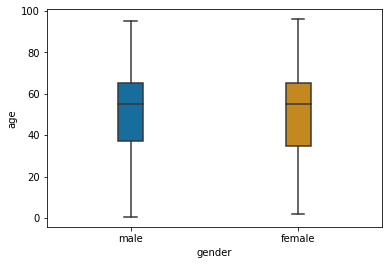

In [26]:
bplot = sns.boxplot(y='age', x='gender', 
                 data=df_age, 
                 width=0.15,
                 palette="colorblind")

# All below: Hong Kong 

In [27]:
file1 = r'HongKong.csv'
df1 = pd.read_csv(file1,sep=';')
df1

,reporting date,country,gender,age
0,22/01/2020,Hong Kong,male,39.0
1,22/01/2020,Hong Kong,male,56.0
2,24/01/2020,Hong Kong,female,62.0
3,24/01/2020,Hong Kong,female,62.0
4,24/01/2020,Hong Kong,male,63.0
...,...,...,...,...
97,02/03/2020,Hong Kong,male,56.0
98,02/03/2020,Hong Kong,female,71.0
99,02/03/2020,Hong Kong,female,76.0
100,02/03/2020,Hong Kong,male,79.0


## The distribution of covid-19 cases per day 

In [28]:
# Converting the dates to datetime datatype
df1['reporting date'] =  pd.to_datetime(df1['reporting date'], format='%d/%m/%Y')
df1['day'] = pd.to_datetime(df1['reporting date']).dt.day
df1['idx'] = pd.Categorical(df1['reporting date'].astype(str) + '_' + df1['day'].astype(str)).codes
df1

,reporting date,country,gender,age,day,idx
0,2020-01-22,Hong Kong,male,39.0,22,0
1,2020-01-22,Hong Kong,male,56.0,22,0
2,2020-01-24,Hong Kong,female,62.0,24,1
3,2020-01-24,Hong Kong,female,62.0,24,1
4,2020-01-24,Hong Kong,male,63.0,24,1
...,...,...,...,...,...,...
97,2020-03-02,Hong Kong,male,56.0,2,31
98,2020-03-02,Hong Kong,female,71.0,2,31
99,2020-03-02,Hong Kong,female,76.0,2,31
100,2020-03-02,Hong Kong,male,79.0,2,31


In [29]:
df1['Count'] = df1.groupby(['idx'])['idx'].transform('count')
df1.head()

,reporting date,country,gender,age,day,idx,Count
0,2020-01-22,Hong Kong,male,39.0,22,0,2
1,2020-01-22,Hong Kong,male,56.0,22,0,2
2,2020-01-24,Hong Kong,female,62.0,24,1,3
3,2020-01-24,Hong Kong,female,62.0,24,1,3
4,2020-01-24,Hong Kong,male,63.0,24,1,3


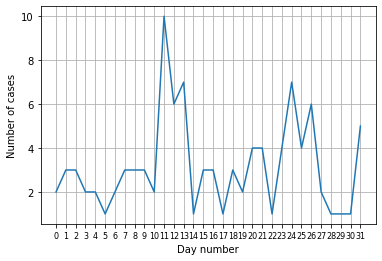

In [30]:
keys = [pair for pair, data in df1.groupby(['idx'])]

plt.plot(keys, df1.groupby(['idx']).count()['Count'])
plt.ylabel('Number of cases')
plt.xlabel('Day number')
plt.xticks(keys, rotation='horizontal', size=8)
plt.grid()
plt.show()

## The distribution of covid-19 cases by cumulative

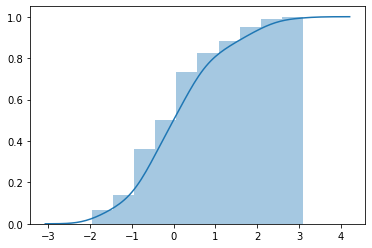

In [31]:
#Cumulative random distribution
x = np.random.randn(102)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs);

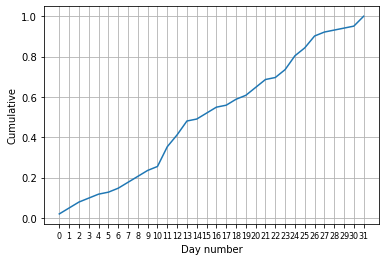

In [32]:
# Cumulative distribution 
keys = [pair for pair, df in df1.groupby(['idx'])]

plt.plot(keys, df1.groupby(['idx']).count()['Count'].cumsum()/df1.count()['Count'].sum())
plt.ylabel('Cumulative')
plt.xlabel('Day number')
plt.xticks(keys, rotation='horizontal', size=8)
plt.grid()
plt.show()


## The rate of increase per day of the number of infected

In [33]:
s = df1.idx
counts = s.value_counts()
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df2 = pd.DataFrame({'counts': counts, '% rate': percent100})
df2

,counts,% rate
11,10,9.8%
13,7,6.9%
24,7,6.9%
26,6,5.9%
12,6,5.9%
31,5,4.9%
25,4,3.9%
23,4,3.9%
21,4,3.9%
20,4,3.9%


 ## The proportion of infected persons by age group and by gender

By age group 

In [34]:
df1.loc[:,('Range')] = np.where(df1.loc[:,('age')] >=30, 'Adult','Young')
df1.loc[:,('Range')] = np.where(df1.loc[:,('age')] >=60, 'Old',df1['Range'])
df1

,reporting date,country,gender,age,day,idx,Count,Range
0,2020-01-22,Hong Kong,male,39.0,22,0,2,Adult
1,2020-01-22,Hong Kong,male,56.0,22,0,2,Adult
2,2020-01-24,Hong Kong,female,62.0,24,1,3,Old
3,2020-01-24,Hong Kong,female,62.0,24,1,3,Old
4,2020-01-24,Hong Kong,male,63.0,24,1,3,Old
...,...,...,...,...,...,...,...,...
97,2020-03-02,Hong Kong,male,56.0,2,31,5,Adult
98,2020-03-02,Hong Kong,female,71.0,2,31,5,Old
99,2020-03-02,Hong Kong,female,76.0,2,31,5,Old
100,2020-03-02,Hong Kong,male,79.0,2,31,5,Old


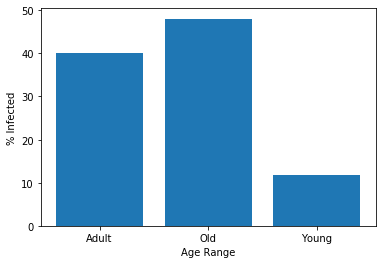

In [35]:
keys = [rang for rang, data in df1.groupby(['Range'])]

plt.bar(keys,(df1.groupby(['Range'])['country'].count())*100/102)
plt.ylabel('% Infected')
plt.xlabel('Age Range')
plt.xticks(keys, rotation='horizontal', size=10)
plt.show()

In [36]:
# Percentage by age group 
(df1.groupby(['Range'])['country'].count())*100/102

Range
Adult    40.196078
Old      48.039216
Young    11.764706
Name: country, dtype: float64

By gender

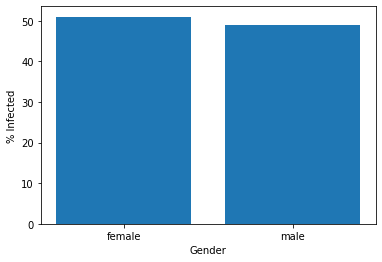

In [37]:
keys = [Gender for Gender, data in df1.groupby(['gender'])]

plt.bar(keys,(df1.groupby(['gender'])['country'].count())*100/102)
plt.ylabel('% Infected')
plt.xlabel('Gender')
plt.xticks(keys, rotation='horizontal', size=10)
plt.show()

In [38]:
# Percentage by gender
(df1.groupby(['gender'])['country'].count())*100/102

gender
female    50.980392
male      49.019608
Name: country, dtype: float64

## The probabilities of being infected, of being infected by age group and by gender

## Bayesian Modeling for counting probability of being infected  

Drichelet-Multinomial expect value

In [39]:
ranges = ['old', 'adult', 'young']
# Observations
c = np.array([519, 757, 231])
#Pseudocounts
alphas1 = np.array([0.1,0.1,0.1])
expected1 = (alphas1 + c) / (c.sum() + alphas1.sum())
print(expected1)

alphas2 = np.array([1,1,1])
expected2 = (alphas2 + c) / (c.sum() + alphas2.sum())
print(expected2)

alphas = np.array([0.01,0.01,0.01])
expected = (alphas + c) / (c.sum() + alphas.sum())
print(expected)

alphas3 = np.array([100,100,100])
expected3 = (alphas3 + c) / (c.sum() + alphas3.sum())
print(expected3)

#Conclusion: Not relevant 

[0.34439063 0.50228886 0.15332051]
[0.34437086 0.50198675 0.15364238]
[0.34439261 0.50231913 0.15328826]
[0.34255672 0.47426674 0.18317654]


Bayesian Inference

In [40]:
hk = df1.drop(['reporting date','country','day','idx','Count'], axis=1)
hk = hk.dropna()
hk

,gender,age,Range
0,male,39.0,Adult
1,male,56.0,Adult
2,female,62.0,Old
3,female,62.0,Old
4,male,63.0,Old
...,...,...,...
97,male,56.0,Adult
98,female,71.0,Old
99,female,76.0,Old
100,male,79.0,Old


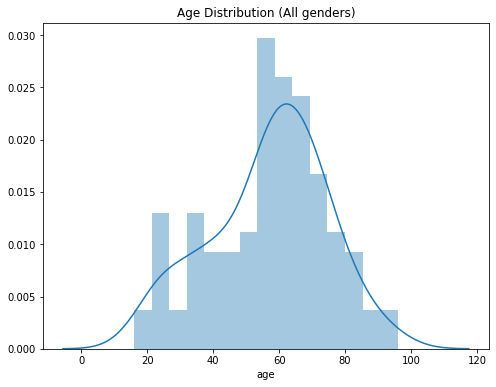

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(hk['age'], bins=15, ax=ax);
ax.set(title='Age Distribution (All genders)');

In [42]:
num_cases_hk = 101
total_num_cases= 3397
# Let I: infected; 
print('probability of getting infected in Hong Kong is P(I)={}'.format(num_cases_hk/total_num_cases))

probability of getting infected in Hong Kong is P(I)=0.02973211657344716


# Bonus: Probability of infection for male smokers worldwide (ML:Train/Test)

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [44]:
# Data retrived from ourworldindata.org on 05/26/2020
data = pd.read_csv('owid-covid-data.csv')
data.head()
data =data.dropna()

In [45]:
# Taking integers 
data = data.iloc[:,1:-1]

In [46]:
# Transforming non-numerical labels to numerical labels
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [47]:
# Compute correlation of columns by pairs
corr = data.corr()

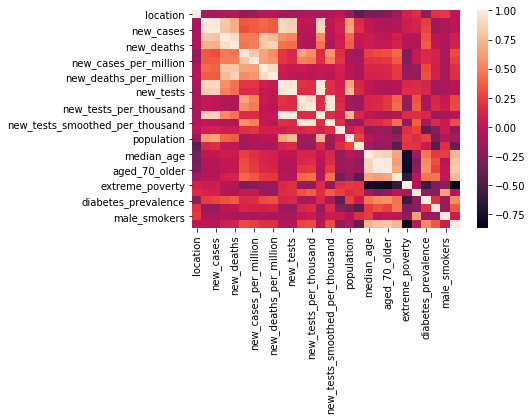

In [48]:
sns.heatmap(corr);

In [49]:
# split the the data set into two sets: a training set and a testing set.
# training set is 60% here and the rest is for testing 
X_train, X_test, y_train, y_test = train_test_split(data[['male_smokers']],data.new_cases,train_size=0.6)

In [50]:
X_train

,male_smokers
3922,13.5
9977,43.1
10019,43.1
8476,76.1
9992,43.1
...,...
19498,33.2
3913,13.5
10003,43.1
4106,17.4


In [51]:
X_test

,male_smokers
15273,21.6
10025,43.1
3910,13.5
16461,18.8
14583,36.7
...,...
18063,65.8
18066,65.8
15298,21.6
8434,76.1


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_predicted = model.predict(X_test)

In [55]:
# Predicted probabilities for male smokers 
model.predict_proba(X_test)

array([[1.70876511e-01, 2.54507639e-02, 2.47475002e-02, ...,
        1.44481621e-03, 1.44481621e-03, 1.44481621e-03],
       [1.64508587e-01, 3.53059687e-02, 2.62804003e-02, ...,
        5.24418108e-04, 5.24418108e-04, 5.24418108e-04],
       [1.65703074e-01, 2.15071025e-02, 2.31276937e-02, ...,
        2.02332262e-03, 2.02332262e-03, 2.02332262e-03],
       ...,
       [1.70876511e-01, 2.54507639e-02, 2.47475002e-02, ...,
        1.44481621e-03, 1.44481621e-03, 1.44481621e-03],
       [1.21976113e-01, 4.58595725e-02, 2.26514341e-02, ...,
        8.70009558e-05, 8.70009558e-05, 8.70009558e-05],
       [1.68306578e-01, 2.30655667e-02, 2.38365001e-02, ...,
        1.77738740e-03, 1.77738740e-03, 1.77738740e-03]])

In [56]:
# Model accuracy
model.score(X_test,y_test)

0.13861386138613863

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data[['male_smokers']],data.new_cases,train_size=0.2)

In [58]:
model.score(X_test,y_test)

0.14745972738537794

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data[['male_smokers']],data.new_cases,train_size=0.9)

In [60]:
model.score(X_test,y_test)

0.09900990099009901

In [61]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [63]:
# Perform 10-fold cross validation
scores = cross_val_score(model, data[['male_smokers']], data.new_cases, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.15841584 0.15841584 0.15841584 0.15841584 0.14851485 0.14851485
 0.14851485 0.14851485 0.11       0.15      ]


In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.15 (+/- 0.03)


### Max accuracy of 0.18, the predictions cannot be taken into consideration